# DFI Tutorial

## Description
The Dynamic Flexiblity index (DFI) is a measure of each residue's contribution to a protein's dynamics. A low %DFI score indicates a rigid portion of the protein while a high %DFI score indicates a flexible portion of the protein. The %DFI score has been used as a predictive feature in genetic disease prediction. Mutations in genomes can lead to proteins which can misfunction, manifesting in genetic disease. Our proteome-wide analysis using DFI indicates that certain sites play a critical role in the functinally reated dynamics (i.e, those with low dfi values); therefore, mutations at those sites are more likely to be associated with disease. DFI has been used to study docking, protein evolution, and disease evolution 

## Table of Contents

1. Basic DFI
2. Saving Results
3. Outputing a PDB with the b-factors replaced with the %DFI Profile
4. Calling from the commandline
5. Running f-DFI
6. Using a covariance matrix 


In [38]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dfi.dfi_calc

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Basic DFI

grab a pdb from the protein data bank

In [39]:
dfi.fetch_pdb('1l2y')

let's run DFI on a single protein 

In [40]:
df_dfi = dfi.calc_dfi('1l2y.pdb')

when we run the command dfi.calc_dfi it will run DFI and return the DataFrame of the results 

In [41]:
df_dfi.head()

,ResI,dfi,pctdfi,ChainID,Res,R
0,1,0.073930,0.95,A,ASN,N
1,2,0.057060,0.75,A,LEU,L
2,3,0.036659,0.30,A,TYR,Y
3,4,0.026492,0.15,A,ILE,I
4,5,0.031397,0.25,A,GLN,Q


the fields of the DataFrame are: 
- ResI: The residue index found in the PDB
- dfi: The raw dfi score
- pctdfi: The pct ranking of the DFI score
- ChainID: The Chain of the PDB
- Res: The three-letter residue code 
- R: The one letter-residue code 

let's to some basic plotting

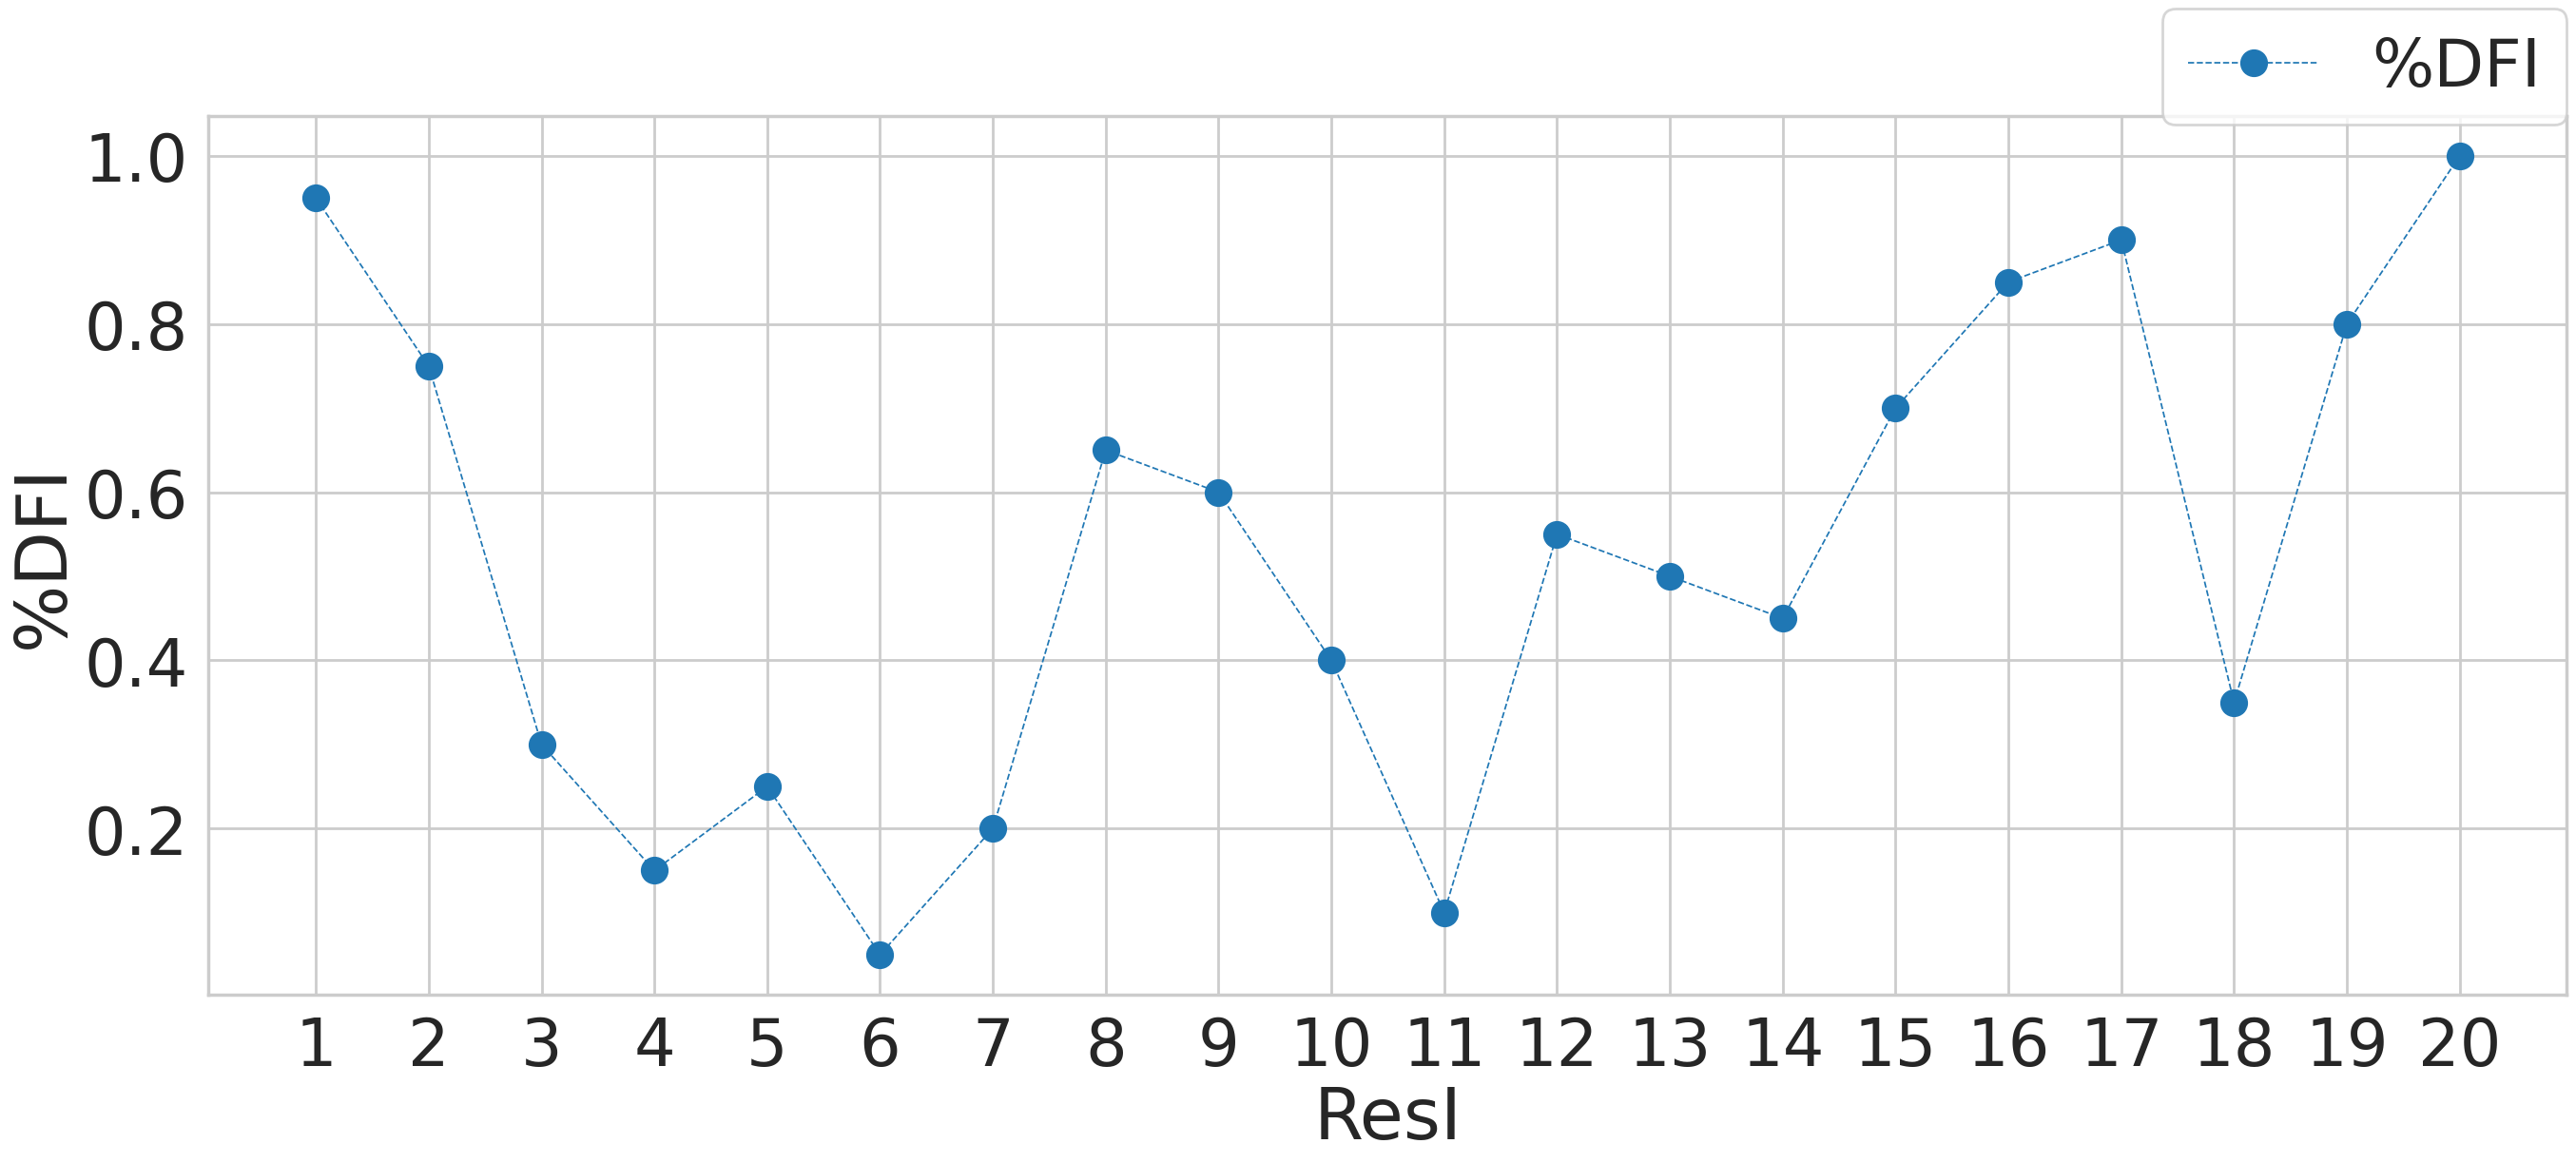

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(32, 12))
sns.set_context("poster", font_scale=2.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})

ResI = df_dfi.ResI.values
pctdfi = df_dfi.pctdfi.values
plt.plot(ResI, pctdfi, label='%DFI',
         marker='o', linestyle='--', markersize=20)
plt.xlabel('ResI')
plt.ylabel('%DFI')
plt.legend(bbox_to_anchor=(0., 1.005, 1., .102), loc=7,ncol=2, borderaxespad=0.)

this is a plot of the DFI profile 

# 2.Saving Results

In [43]:
dfi.calc_dfi('1l2y.pdb',writetofile=True)

Wrote out to 1l2y-dfianalysis.csv


## Saving results with a custom name 

In [44]:
dfi.calc_dfi('1l2y.pdb',writetofile=True, dfianalfile='test.csv')

Wrote out to test.csv


# 3.Output a pdb with the b-factors column replaced with the pctdfi values 

In [45]:
dfi.calc_dfi('1l2y.pdb',writetofile=True,colorpdb=True)

Wrote out to 1l2y-dfianalysis.csv
Wrote out to file, 1l2y-dficolor.pdb


# 4.Calling from the command line

## Example 
### Run just bare DFI on a protein 
```
./dfi_calc.py --pdb 1l2y.pdb --fdfi A10 
```
This will run dfi on 1l2y.pdb and write out to 1l2y-dfianalysis.csv,
1l2y-fdficolor.pdb, and 1l2y-dficolor.pdb.
	
### Run based on UniprotID 
```
./dfi.py P42771
```
This will take the UniprotID and blast it on the NCBI server, find the
highest PDB hit and then run dfi analysis on that PDB. The output is
P42771-1DC2-dfianalysis.csv. 
*Note: If you query the NCBI server too often it will push your query
down the queue*


# 5. Running f-DFI 

In [46]:
df_dfi = dfi.calc_dfi('1l2y.pdb',ls_reschain=['A18'])

We can run f-DFI by passing a list of the relevant residues using the keyword `ls_reschain`. The format is chainIDResidueIndex. For instance A18 is the 18th residue on Chain A. The Residue Index and ChainID must match what is found in the PDB file.

Five new fields will appear: 
- fdfi: Raw f-dfi value
- pctfdfi: Percent ranking of f-dfi
- ravg: Average distance away from the functionally relevant sites
- rmin: Minimum distance away from the functionally relevant sites
- A: A classification of whether a site is a alloseric site or not

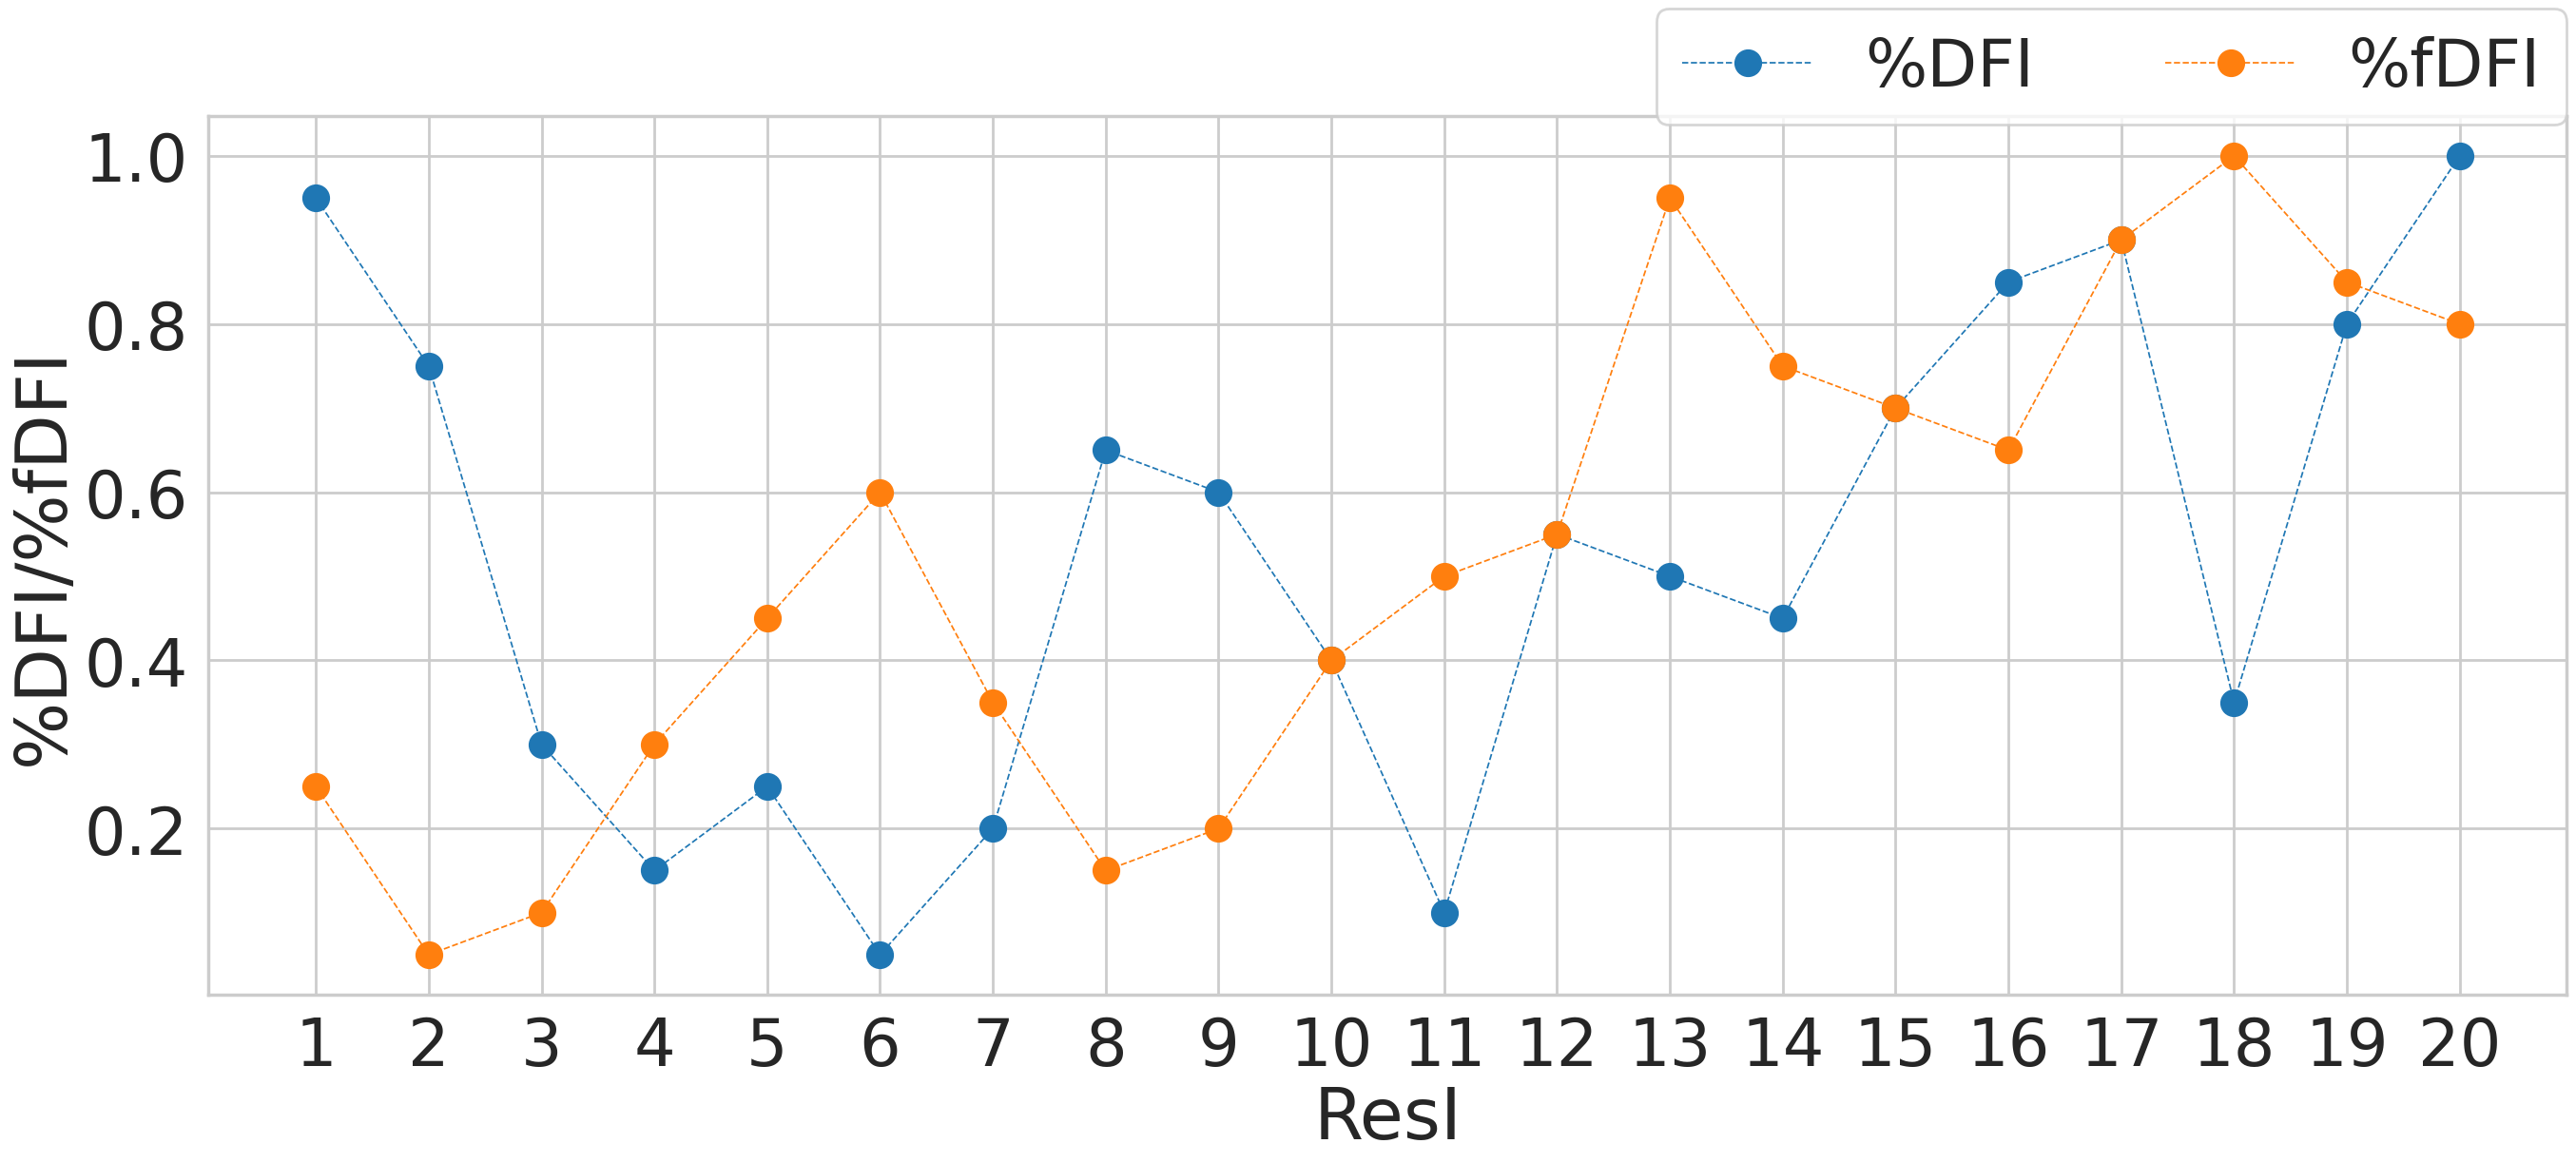

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(32, 12))
sns.set_context("poster", font_scale=2.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})

ResI = df_dfi.ResI.values
pctdfi = df_dfi.pctdfi.values
pctfdfi = df_dfi.pctfdfi.values

plt.plot(ResI, pctdfi, label='%DFI',
         marker='o', linestyle='--', markersize=20)
plt.plot(ResI, pctfdfi, label='%fDFI',
        marker='o', linestyle='--', markersize=20)
plt.xlabel('ResI')
plt.ylabel('%DFI/%fDFI')
plt.legend(bbox_to_anchor=(0., 1.005, 1., .102), loc=7,ncol=2, borderaxespad=0.)

# 6. Finally we can also pass in a covariance matrix 

In [48]:
df_dfi = dfi.calc_dfi('1l2y.pdb',ls_reschain=['A18'], covar='./../dfi/data/1l2y_covar.dat')

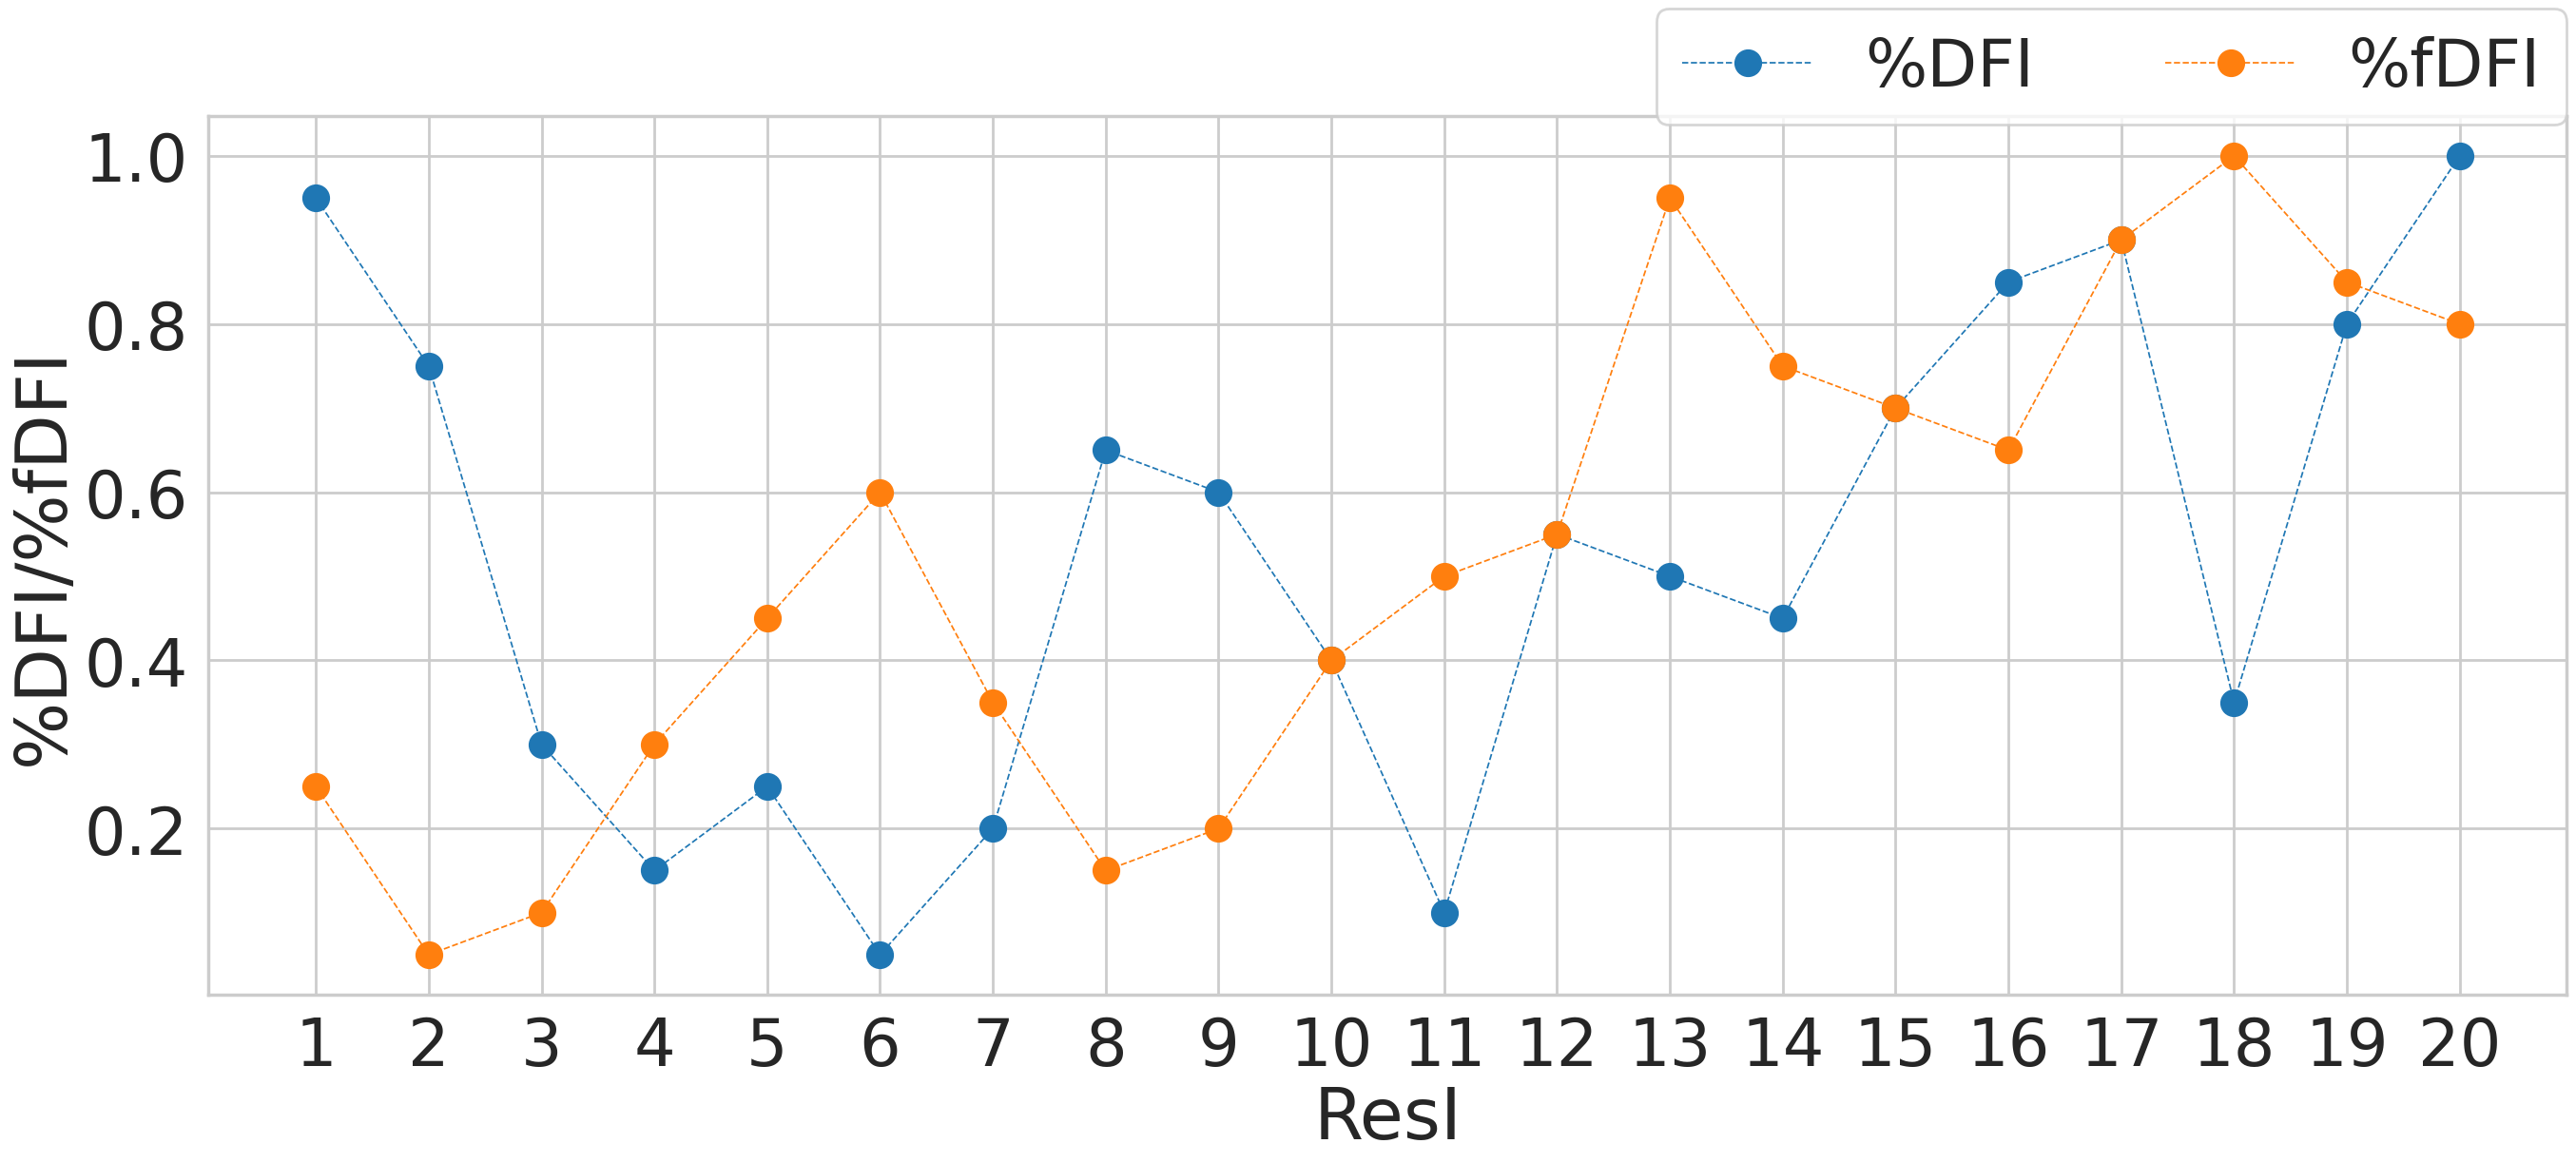

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(32, 12))
sns.set_context("poster", font_scale=2.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})

ResI = df_dfi.ResI.values
pctdfi = df_dfi.pctdfi.values
pctfdfi = df_dfi.pctfdfi.values

plt.plot(ResI, pctdfi, label='%DFI',
         marker='o', linestyle='--', markersize=20)
plt.plot(ResI, pctfdfi, label='%fDFI',
        marker='o', linestyle='--', markersize=20)
plt.xlabel('ResI')
plt.ylabel('%DFI/%fDFI')
plt.legend(bbox_to_anchor=(0., 1.005, 1., .102), loc=7,ncol=2, borderaxespad=0.)